In [1]:
# This snippet of code properly adds the working source root path to python's path
# so you no longer have to install spykshrk through setuptools
import sys, os
root_depth = 2
notebook_dir = globals()['_dh'][0]
root_path = os.path.abspath(os.path.join(notebook_dir, '../'*root_depth))
# Add to python's path
try:
    while True:
        sys.path.remove(root_path)
except ValueError:
    # no more root paths
    pass
sys.path.append(root_path)
# Alternatively set root path as current working directory
#os.chdir(root_path)

In [1]:
# import pandas as pd
import sys
import os.path
import numpy as np
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from spykshrk.realtime.datatypes import Datatypes

# import bokeh.plotting
# from bokeh.plotting import figure, output_notebook, show, gridplot, reset_output
# output_notebook()

#pd.set_option('float_format', '{:,.1f}'.format)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 120)

matplotlib.rcParams.update({'font.size': 28})


In [2]:
#config_file = '/opt/data36/daliu/realtime/spykshrk/timing/bond.config.json'
#config_file = '/opt/data36/daliu/realtime/spykshrk/test/test_animal.config.json'

config_file = '/home/mcoulter/spykshrk_realtime/config/test_single_MEC.json'

config = json.load(open(config_file, 'r'))

#hdf_file = os.path.join(config['files']['output_dir'],
#                        '{}.rec_merged.h5'.format(config['files']['prefix']))
hdf_file = '/mnt/vortex/mcoulter/spykshrk_realtime/output/test_single_MEC.rec_merged.h5'

store = pd.HDFStore(hdf_file, mode='r')
timing = store['rec_100']

In [49]:
timing

,rec_ind,timestamp,elec_grp_id,rank,label,datatype,wtime_raw,wtime_adj
0,0,39659046,24,3,enc_recv,2,1.562791e+09,1.562791e+09
1,3,39659096,24,3,spk_dec,2,1.562791e+09,1.562791e+09
2,1,39659096,24,3,enc_recv,2,1.562791e+09,1.562791e+09
3,0,39659096,24,1,dec_recv,2,1.562791e+09,1.562791e+09
4,1,39659096,24,1,dec_proc,2,1.562791e+09,1.562791e+09
...,...,...,...,...,...,...,...,...
27538186,8396895,92404620,26,0,stim_rip_state,1,1.562792e+09,1.562792e+09
27538187,8396893,92404620,24,0,stim_rip_state,1,1.562792e+09,1.562792e+09
27538188,8396899,92404640,26,0,stim_rip_state,1,1.562792e+09,1.562792e+09
27538189,8396897,92404640,24,0,stim_rip_state,1,1.562792e+09,1.562792e+09


In [125]:
np.set_printoptions(precision=15)
#(timing['wtime_adj'].values[10:20])/1000*30
tet_30['timing_diff'].values[125:137]

array([1.562789417719762e+09, 1.562789417717299e+09,
       1.562789417722427e+09, 1.562789417717233e+09,
       1.562789417714026e+09, 1.562789417724086e+09,
       1.562789417719460e+09, 1.562789417716355e+09,
       1.562789417714152e+09, 1.562789417723845e+09,
       1.562789417721337e+09, 1.562789417719467e+09])

In [126]:
#note: wtime is in seconds, so need to convert timestamp into seconds
receive_encoding_spike = timing[timing['label']=='enc_recv']
tet_30 = receive_encoding_spike[receive_encoding_spike['elec_grp_id']==26]
tet_30['timing_diff'] = tet_30['wtime_adj'] - tet_30['timestamp']/30000
tet_30['timing_zeroed'] = tet_30['timing_diff']-1.562789417714026e+09
tet_30['timing_delay_avg'] = tet_30['timing_zeroed'].rolling(window=1000).mean()
tet_30

/home/mcoulter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/mcoulter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/mcoulter/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

,rec_ind,timestamp,elec_grp_id,rank,label,datatype,wtime_raw,wtime_adj,timing_diff,timing_zeroed,timing_delay_avg
6,0,39659121,26,4,enc_recv,2,1.562791e+09,1.562791e+09,1.562789e+09,0.102302,NaN
11,1,39659198,26,4,enc_recv,2,1.562791e+09,1.562791e+09,1.562789e+09,0.099838,NaN
15,4,39659261,26,4,enc_recv,2,1.562791e+09,1.562791e+09,1.562789e+09,0.098256,NaN
23,7,39659312,26,4,enc_recv,2,1.562791e+09,1.562791e+09,1.562789e+09,0.096835,NaN
31,8,39659367,26,4,enc_recv,2,1.562791e+09,1.562791e+09,1.562789e+09,0.095070,NaN
...,...,...,...,...,...,...,...,...,...,...,...
27537458,997270,92402899,26,4,enc_recv,2,1.562792e+09,1.562792e+09,1.562789e+09,0.002779,0.013570
27537505,997274,92402982,26,4,enc_recv,2,1.562792e+09,1.562792e+09,1.562789e+09,0.006484,0.013566
27537534,997275,92403047,26,4,enc_recv,2,1.562792e+09,1.562792e+09,1.562789e+09,0.009425,0.013566
27537572,997276,92403136,26,4,enc_recv,2,1.562792e+09,1.562792e+09,1.562789e+09,0.006541,0.013566


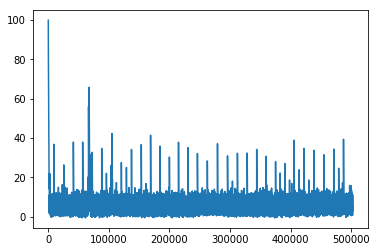

In [128]:
#plt.scatter(np.arange(0,12,1),tet_30['timing_zeroed'][125:137]*1000)
plt.plot(tet_30['timing_zeroed'][1:10000]*1000)

(0, 50)

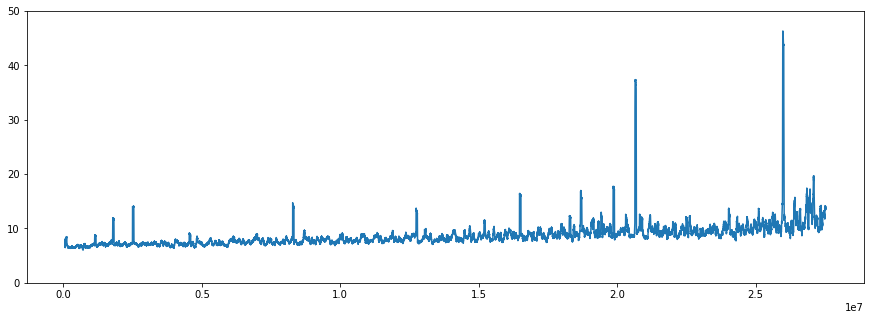

In [130]:
plt.figure(figsize=(15,5))
#plt.hist(tet_30['timing_zeroed'].values,bins=100)
#plt.plot(tet_30['timestamp'].values/tet_30['wtime_adj'].values)
#plt.plot(tet_30['timing_zeroed'][160000:160100]*1000)
plt.plot(tet_30['timing_delay_avg']*1000)
plt.ylim([0,50])

In [3]:
timing['label'].unique()

array(['enc_recv', 'spk_dec', 'dec_recv', 'dec_proc', 'rip_send',
       'rip_recv', 'stim_rip_state', 'spk_enc'], dtype=object)

In [4]:
# Select timing data only used for spike decoding

spk_timing = timing.query("(label == 'sim_send' | "
                          "label == 'spk_dec' | "
                          "label == 'spk_enc' | "
                          "label == 'dec_recv' | "
                          "label == 'dec_proc') & "
                          "datatype == {}".format(Datatypes.SPIKES))


In [5]:
spk_timing_pivot = spk_timing.pivot_table(values='wtime_adj', index=['timestamp', 'elec_grp_id', 'datatype'], columns='label')

# Drop timing info for spikes ignored by encoder and decoder nodes, likely because they did not meet
# the encode or decode criterion.
spk_timing_pivot = spk_timing_pivot.dropna(axis=0, how='any')


In [6]:
spk_timing_pivot

,,label,dec_proc,dec_recv,spk_dec,spk_enc
timestamp,elec_grp_id,datatype,,,,
39660642,24,2,1.562791e+09,1.562791e+09,1.562791e+09,1.562791e+09
39660694,24,2,1.562791e+09,1.562791e+09,1.562791e+09,1.562791e+09
39660794,24,2,1.562791e+09,1.562791e+09,1.562791e+09,1.562791e+09
39660847,24,2,1.562791e+09,1.562791e+09,1.562791e+09,1.562791e+09
39660957,24,2,1.562791e+09,1.562791e+09,1.562791e+09,1.562791e+09
...,...,...,...,...,...,...
92402175,26,2,1.562792e+09,1.562792e+09,1.562792e+09,1.562792e+09
92402296,30,2,1.562792e+09,1.562792e+09,1.562792e+09,1.562792e+09
92402419,30,2,1.562792e+09,1.562792e+09,1.562792e+09,1.562792e+09


In [7]:
%%time
spk_timing_pivot.eval("sim_to_spkdec = spk_dec - sim_send", inplace=True)
spk_timing_pivot.eval("spkdec_to_enc = spk_enc - spk_dec", inplace=True)
spk_timing_pivot.eval("spkdec_to_decoder = dec_recv - spk_dec", inplace=True)
spk_timing_pivot.eval("sim_to_decoder = dec_recv - sim_send", inplace=True)
spk_timing_pivot.eval("sim_to_dec_proc = dec_proc - sim_send", inplace=True)

UndefinedVariableError: name 'sim_send' is not defined

In [10]:
spk_timing_pivot.query('sim_to_decoder > .1')

In [11]:
sim_dec_proc_mean = spk_timing_pivot.loc[:, 'sim_to_dec_proc'].mean()
sim_dec_proc_med = spk_timing_pivot.loc[:, 'sim_to_dec_proc'].median()
sim_dec_proc_max = spk_timing_pivot.loc[:, 'sim_to_dec_proc'].max()
sim_dec_proc_min = spk_timing_pivot.loc[:, 'sim_to_dec_proc'].min()

sim_decoder_mean = spk_timing_pivot.loc[:, 'sim_to_decoder'].mean()
sim_decoder_med = spk_timing_pivot.loc[:, 'sim_to_decoder'].median()
sim_decoder_max = spk_timing_pivot.loc[:, 'sim_to_decoder'].max()
sim_decoder_min = spk_timing_pivot.loc[:, 'sim_to_decoder'].min()

sim_spkdec_mean = spk_timing_pivot.loc[:, 'sim_to_spkdec'].mean()
sim_spkdec_med = spk_timing_pivot.loc[:, 'sim_to_spkdec'].median()
sim_spkdec_max = spk_timing_pivot.loc[:, 'sim_to_spkdec'].max()
sim_spkdec_min = spk_timing_pivot.loc[:, 'sim_to_spkdec'].min()

spkdec_decoder_mean = spk_timing_pivot.loc[:, 'spkdec_to_decoder'].mean()
spkdec_decoder_med = spk_timing_pivot.loc[:, 'spkdec_to_decoder'].median()
spkdec_decoder_max = spk_timing_pivot.loc[:, 'spkdec_to_decoder'].max()
spkdec_decoder_min = spk_timing_pivot.loc[:, 'spkdec_to_decoder'].min()

print('sim_to_dec_proc mean (median) (min, max): {:.04} ({:.04}) ({:.04}, {:.04}) ms'.format(sim_dec_proc_mean*1000, sim_dec_proc_med*1000,
                                                                                            sim_dec_proc_min*1000, sim_dec_proc_max*1000))
print('sim_to_decoder mean (median) (min, max): {:.04} ({:.04}) ({:.04}, {:.04}) ms'.format(sim_decoder_mean*1000, sim_decoder_med*1000,
                                                                                            sim_decoder_min*1000, sim_decoder_max*1000))
print('sim_to_spkdec mean (median) (min, max): {:.04} ({:.04}) ({:.04}, {:.04}) ms'.format(sim_spkdec_mean*1000, sim_spkdec_med*1000, 
                                                                                        sim_spkdec_min*1000, sim_spkdec_max*1000))
print('spkdec_to_decoder mean (median) (min, max): {:.04} ({:.04}) ({:.04}, {:.04}) ms'.format(spkdec_decoder_mean*1000, spkdec_decoder_med*1000,
                                                                                           spkdec_decoder_min*1000, spkdec_decoder_max*1000))

sim_to_decoder mean (median) (min, max): 1.604 (1.226) (-784.4, 96.27) ms

sim_to_dec mean (median) (min, max): 1.545 (1.163) (-784.5, 789.8) ms

dec_to_decoder mean (median) (min, max): 0.0591 (0.04697) (-784.9, 3.969) ms


In [12]:
temp = spk_timing_pivot['spkdec_to_decoder']
np.sum(np.diff(temp.values[0:10000]))

In [13]:
spk_timing_pivot

In [14]:
plt.plot(np.diff(spk_timing_pivot['dec_recv'].values))
plt.xlim([0,100])
plt.show()

In [15]:
plt.figure(figsize=[40,10])
plt.plot(spk_timing_pivot['spkdec_to_decoder'].values.transpose())
#plt.xlim([0, 37000])
#plt.ylim([-.001, .001])
plt.grid(True)
plt.show()

In [16]:
hist_range = (0, 5)
hist_step = 0.005

plt.figure(figsize=[20,10])
plt.hist(spk_timing_pivot['sim_to_decoder']*1000, np.arange(hist_range[0], hist_range[1], hist_step), range=hist_range, histtype='step', lw=3, ec='blue')

plt.hist(spk_timing_pivot['sim_to_spkdec']*1000, np.arange(hist_range[0], hist_range[1], hist_step), range=hist_range, histtype='step', lw=3, ec='cyan')

plt.hist(spk_timing_pivot['sim_to_dec_proc']*1000, np.arange(hist_range[0], hist_range[1], hist_step), range=hist_range, histtype='step', lw=3, ec='orange')

plt.show()


In [17]:
fig, ax = plt.subplots(figsize=[20,10])
ax.hist(spk_timing_pivot['sim_to_dec_proc']*1000, np.arange(hist_range[0], hist_range[1], 0.05),
        range=hist_range, fc='cyan')
plt.xlim([0,5])

ax.text(0.8, 0.6, 'Mean: {:.02} ms\nMedian: {:.02} ms'.format(np.mean(spk_timing_pivot['sim_to_dec_proc']*1000),
                                                              np.median(spk_timing_pivot['sim_to_dec_proc']*1000)),
        transform=ax.transAxes, horizontalalignment='right', bbox={'facecolor': 'white', 'pad':20})

plt.xlabel('Milliseconds')
plt.ylabel('Number of spikes')
plt.title('Latency of single spikes from source to updating posterior', fontdict={'fontweight':'bold'})
plt.show()

In [43]:
print('Latency to update decoding process:\n'
      'Mean: {:0.03} ms\nMedian: {:0.03} ms'.format(np.mean(spk_timing_pivot['sim_to_dec_proc']*1000), 
                                                  np.median(spk_timing_pivot['sim_to_dec_proc']*1000)))
